<a href="https://colab.research.google.com/github/donny95/py_d_on/blob/main/DL_auto_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

In [ ]:
# mpg   cylinder   display   continuous   power   weight   accel   year   origin   name

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/auto_mpg/auto-mpg.data", sep='\t') 

In [ ]:
df

,18.0 8 307.0 130.0 3504. 12.0 70 1,chevrolet chevelle malibu
0,15.0 8 350.0 165.0 3693. 11...,buick skylark 320
1,18.0 8 318.0 150.0 3436. 11...,plymouth satellite
2,16.0 8 304.0 150.0 3433. 12...,amc rebel sst
3,17.0 8 302.0 140.0 3449. 10...,ford torino
4,15.0 8 429.0 198.0 4341. 10...,ford galaxie 500
...,...,...
392,27.0 4 140.0 86.00 2790. 15...,ford mustang gl
393,44.0 4 97.00 52.00 2130. 24...,vw pickup
394,32.0 4 135.0 84.00 2295. 11...,dodge rampage
395,28.0 4 120.0 79.00 2625. 18...,ford ranger


In [ ]:
column_names = ['mpg','cylinder','display','power','weight',
                'accel', 'year', 'origin', 'name']
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/auto_mpg/auto-mpg.data", names=column_names,
                      na_values = "?", delimiter=r"\s+")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cylinder  398 non-null    int64  
 2   display   398 non-null    float64
 3   power     392 non-null    float64
 4   weight    398 non-null    float64
 5   accel     398 non-null    float64
 6   year      398 non-null    int64  
 7   origin    398 non-null    int64  
 8   name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [ ]:
df.shape

(398, 9)

In [ ]:
# power : missing value 6개  결측값 처리
df.describe()

,mpg,cylinder,display,power,weight,accel,year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
df.isna().sum()

mpg         0
cylinder    0
display     0
power       6
weight      0
accel       0
year        0
origin      0
name        0
dtype: int64

In [ ]:
df['power']=df.fillna(df['power'].mean())

In [ ]:
df.isna().sum()

mpg         0
cylinder    0
display     0
power       0
weight      0
accel       0
year        0
origin      0
name        0
dtype: int64

In [ ]:
df

,mpg,cylinder,display,power,weight,accel,year,origin,name
0,18.0,8,307.0,18,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,15,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,18,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,16,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,17,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,27,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,44,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,32,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,28,2625.0,18.6,82,1,ford ranger


In [ ]:
# object 값 처리
df["name"].nunique()

# 305건 : 너무 유니크한 값이므로 name 은 drop 하도록 한다.




305

In [ ]:
df.drop("name", axis=1, inplace=True)

In [ ]:
# origin : 원핫 인코딩 진행 --> 1(usa) , 2(eu), 3(jp)

In [ ]:
df.columns

Index(['mpg', 'cylinder', 'display', 'power', 'weight', 'accel', 'year',
       'origin'],
      dtype='object')

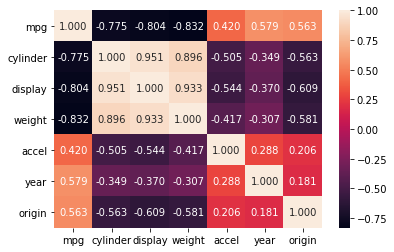

In [ ]:
# 상관분석

sns.heatmap(df.corr(), annot=True, fmt=".3f")


- mpg 과 음의 상관관계를 가지는 것들.

In [ ]:
# 모델 

import tensorflow as tf
from keras.models import  Sequential #모델을 순서대로 하나하나씩 쌓음
from keras.layers import Dense 

In [ ]:

def CHART_PLOT_HISTORY(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['mse'],    label='mse')
    plt.plot(hist['epoch'], hist['val_mse'],label = 'val_mse')
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],    label='loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'val_loss')
    plt.legend()
    plt.show()

In [ ]:
df.shape

(398, 8)

In [ ]:
model = Sequential()
model.add(Dense(units=16, input_dim=7, activation="relu")) # target 은 제외 -> 7개
model.add(Dense(units=16, activation="relu"))
model.add(Dense(units=8, activation="relu")) 
model.add(Dense(units=8, activation="relu")) 
model.add(Dense(units=1)) # 회기에서는 activation 필요 없음.

model.compile(optimizer='adam', # GD(경사하강-가장정확, 느림), SGD(빠름, 부정확), momentum, ada, adam(경사하강법, 가장 성능좋음)
              loss='mse', # 손실함수(cost loss)
              metrics=["mse","mae"]) 

In [ ]:
#모델이 잘 만들어졌는지 요약 확인!
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 617
Trainable params: 617
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# X , y 로 나누기.
X = df.drop("mpg", axis=1)
y = pd.DataFrame(df["mpg"])


X=np.asarray(X).astype(np.int)
y=np.asarray(y).astype(np.int)

In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X, y, callbacks=[early_stop], validation_split=0.1, epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 40ms/step - loss: 18231.8314 - mse: 18231.8314 - mae: 131.4961 - val_loss: 7996.2969 - val_mse: 7996.2969 - val_mae: 89.1176
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 6806.7143 - mse: 6806.7143 - mae: 81.2672 - val_loss: 3929.7715 - val_mse: 3929.7715 - val_mae: 62.5472
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 3194.7138 - mse: 3194.7138 - mae: 56.2033 - val_loss: 2608.8191 - val_mse: 2608.8191 - val_mae: 50.9264
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 1939.0785 - mse: 1939.0785 - mae: 43.7643 - val_loss: 1778.9828 - val_mse: 1778.9828 - val_mae: 41.9337
Epoch 5/100
12/12 [==============================] - 0s 15ms/step - loss: 1218.0271 - mse: 1218.0271 - mae: 34.4830 - val_loss: 1305.0481 - val_mse: 1305.0481 - val_mae: 35.7504
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 821.0080 - mse: 821.0080 - mae: 27.98

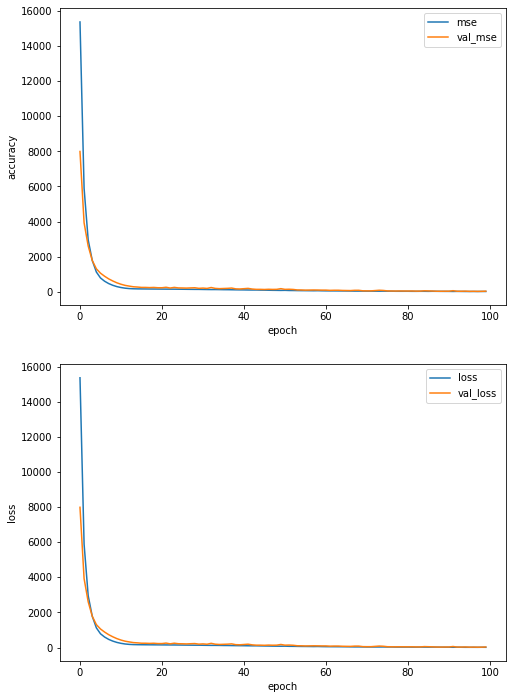

In [ ]:
CHART_PLOT_HISTORY(history)

In [ ]:
loss, mse, mae = model.evaluate(X,y)
print("epoch 100회 평균 loss {:.4f}  mse {:.4f}  mae {:.4f}  rmse {:.4f}".format(loss, mse, mae, np.sqrt(mse)))

13/13 [==============================] - 0s 1ms/step - loss: 15.2746 - mse: 15.2746 - mae: 2.8973
epoch 100회 평균 loss 15.2746  mse 15.2746  mae 2.8973  rmse 3.9083


In [ ]:
# pca 처리
pca_col = ['cylinder', 'display', 'power', 'weight']

In [ ]:
for c in df.columns:
  print(c, df[c].nunique()) 

mpg 129
cylinder 5
display 82
power 129
weight 351
accel 95
year 13
origin 3


origin, year, cylinder  : one hot encoding 할것.

In [ ]:
# enc_col = ['cylinder','year','origin']
# X = pd.get_dummies(X, columns=enc_col, prefix="enc_")
# X

In [ ]:
# 인코딩
from sklearn.preprocessing import OneHotEncoder


cyl_oh = pd.get_dummies(df['cylinder'])
cyl_oh

,3,4,5,6,8
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
393,0,1,0,0,0
394,0,1,0,0,0
395,0,1,0,0,0
396,0,1,0,0,0


In [ ]:
year_oh = pd.get_dummies(df['year'])
ori_oh = pd.get_dummies(df['origin'])

In [ ]:
df = pd.concat([df, cyl_oh, year_oh, ori_oh] , axis=1)
df

,mpg,cylinder,display,power,weight,accel,year,origin,3,4,5,6,8,70,71,72,73,74,75,76,77,78,79,80,81,82,1,2,3
0,18.0,8,307.0,18,3504.0,12.0,70,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,15.0,8,350.0,15,3693.0,11.5,70,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,18.0,8,318.0,18,3436.0,11.0,70,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,16.0,8,304.0,16,3433.0,12.0,70,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,17.0,8,302.0,17,3449.0,10.5,70,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,27,2790.0,15.6,82,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
394,44.0,4,97.0,44,2130.0,24.6,82,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
395,32.0,4,135.0,32,2295.0,11.6,82,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
396,28.0,4,120.0,28,2625.0,18.6,82,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [ ]:

df = df.drop(['cylinder', 'year', 'origin'],axis=1)
df

,mpg,display,power,weight,accel,3,4,5,6,8,70,71,72,73,74,75,76,77,78,79,80,81,82,1,2,3
0,18.0,307.0,18,3504.0,12.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,15.0,350.0,15,3693.0,11.5,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,18.0,318.0,18,3436.0,11.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,16.0,304.0,16,3433.0,12.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,17.0,302.0,17,3449.0,10.5,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,140.0,27,2790.0,15.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
394,44.0,97.0,44,2130.0,24.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
395,32.0,135.0,32,2295.0,11.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
396,28.0,120.0,28,2625.0,18.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
# X , y 로 나누기.
X_oh = df.drop("mpg", axis=1)
y = df["mpg"]


X_oh=np.asarray(X).astype(float)
y=np.asarray(y).astype(float)


In [ ]:
history = model.fit(X_oh, y, callbacks=[early_stop], validation_split=0.1, epochs=150)

Epoch 1/150
12/12 [==============================] - 0s 17ms/step - loss: 13.5816 - mse: 13.5816 - mae: 2.7684 - val_loss: 32.2185 - val_mse: 32.2185 - val_mae: 4.3836
Epoch 2/150
12/12 [==============================] - 0s 5ms/step - loss: 12.7628 - mse: 12.7628 - mae: 2.6412 - val_loss: 31.9874 - val_mse: 31.9874 - val_mae: 4.3414
Epoch 3/150
12/12 [==============================] - 0s 5ms/step - loss: 12.4638 - mse: 12.4638 - mae: 2.6177 - val_loss: 22.7940 - val_mse: 22.7940 - val_mae: 3.5885
Epoch 4/150
12/12 [==============================] - 0s 5ms/step - loss: 11.7692 - mse: 11.7692 - mae: 2.5298 - val_loss: 26.2108 - val_mse: 26.2108 - val_mae: 3.8185
Epoch 5/150
12/12 [==============================] - 0s 5ms/step - loss: 12.5995 - mse: 12.5995 - mae: 2.6226 - val_loss: 19.5188 - val_mse: 19.5188 - val_mae: 3.3090
Epoch 6/150
12/12 [==============================] - 0s 5ms/step - loss: 11.7252 - mse: 11.7252 - mae: 2.5084 - val_loss: 26.2595 - val_mse: 26.2595 - val_mae: 3.83

In [ ]:
loss, mse, mae = model.evaluate(X_oh,y)
print("epoch 100회 one hot enco 평균 loss {:.4f}  mse {:.4f}  mae {:.4f}  rmse {:.4f}".format(loss, mse, mae, np.sqrt(mse)))

13/13 [==============================] - 0s 2ms/step - loss: 8.5668 - mse: 8.5668 - mae: 2.0726
epoch 100회 one hot enco 평균 loss 8.5668  mse 8.5668  mae 2.0726  rmse 2.9269


1st score  : 
13/13 [==============================] - 0s 1ms/step - loss: 506.2323 - mse: 506.2323 - mae: 19.9160
epoch 100회 평균 loss 506.2323  mse 506.2323  mae 19.9160  rmse 22.4996

In [ ]:
#스케일링
